In [21]:
import pandas as pd

## Etape 1 : methodes de choix aléatoire

In [22]:
data= pd.read_table('base_banque_2024_03.txt', sep=';')
data.head()

,id_client,age,sexe,situation_familiale,statut_logement,revenu,flag_tel,flag_email,nb_credits_total,mt_credits_total,nb_credits_actuel,mt_credits_actuel,mt_echeances_actuel,duree_remboursement_actuel,mt_premier_credit,anc_premier_credit,canal_premier_credit,mt_dernier_credit,anc_dernier_credit,canal_dernier_credit
0,ID_000007229325,42,M,Célibataire,NaN,NaN,1,0,9,10133,1,1037,2982.55,2.0,800.00,7243.0,Partenaire,1333.33,724,Mailing
1,ID_000010505545,39,M,Célibataire,NaN,3333.33,1,0,6,36343,1,3507,2619.84,3.0,1066.67,7310.0,Partenaire,3466.67,35,Partenaire
2,ID_000025046774,51,F,Célibataire,Locataire,1306.67,0,0,3,10395,1,5864,31.76,4.0,3061.25,2316.0,Partenaire,5333.33,82,Partenaire
3,ID_000032823695,52,F,Divorcé,Locataire,2466.67,1,0,8,16120,1,4379,631.82,6.0,333.33,6786.0,Partenaire,4000.00,73,Agence
4,ID_000062218736,52,F,Célibataire,Locataire,1838.80,1,0,5,14667,4,4811,309.20,3.0,8000.00,4431.0,Agence,4000.00,958,Agence


In [23]:
echantillon_aleatoire = data['id_client'].sample(n=2000, random_state=1)
echantillon_aleatoire.to_csv('c1_valdes.txt', sep=';', index=False, header=False)

In [24]:
data.isna().sum()

id_client                        0
age                              0
sexe                             0
situation_familiale            196
statut_logement               7995
revenu                        7638
flag_tel                         0
flag_email                       0
nb_credits_total                 0
mt_credits_total                 0
nb_credits_actuel                0
mt_credits_actuel                0
mt_echeances_actuel              0
duree_remboursement_actuel     401
mt_premier_credit                0
anc_premier_credit             798
canal_premier_credit             0
mt_dernier_credit                0
anc_dernier_credit               0
canal_dernier_credit             0
dtype: int64

 ### 2. Informations générales

In [25]:
# Vérifier les types de données et valeurs manquantes
print(data.info())

# Statistiques descriptives des variables numériques
print(data.describe())

# Statistiques descriptives des variables catégoriques
print(data.describe(include="object"))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16480 entries, 0 to 16479
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_client                   16480 non-null  object 
 1   age                         16480 non-null  int64  
 2   sexe                        16480 non-null  object 
 3   situation_familiale         16284 non-null  object 
 4   statut_logement             8485 non-null   object 
 5   revenu                      8842 non-null   float64
 6   flag_tel                    16480 non-null  int64  
 7   flag_email                  16480 non-null  int64  
 8   nb_credits_total            16480 non-null  int64  
 9   mt_credits_total            16480 non-null  int64  
 10  nb_credits_actuel           16480 non-null  int64  
 11  mt_credits_actuel           16480 non-null  int64  
 12  mt_echeances_actuel         16480 non-null  float64
 13  duree_remboursement_actuel  160

 ### 3. Vérification des valeurs manquantes

In [26]:
# Nombre total de valeurs manquantes par colonne
print(data.isnull().sum())

# Pourcentage de valeurs manquantes
print((data.isnull().mean() * 100).sort_values(ascending=False))


id_client                        0
age                              0
sexe                             0
situation_familiale            196
statut_logement               7995
revenu                        7638
flag_tel                         0
flag_email                       0
nb_credits_total                 0
mt_credits_total                 0
nb_credits_actuel                0
mt_credits_actuel                0
mt_echeances_actuel              0
duree_remboursement_actuel     401
mt_premier_credit                0
anc_premier_credit             798
canal_premier_credit             0
mt_dernier_credit                0
anc_dernier_credit               0
canal_dernier_credit             0
dtype: int64
statut_logement               48.513350
revenu                        46.347087
anc_premier_credit             4.842233
duree_remboursement_actuel     2.433252
situation_familiale            1.189320
sexe                           0.000000
id_client                      0.000000
age    

 ### 4. Vérification des doublons

In [27]:
# Nombre de doublons
print(f"Nombre de lignes dupliquées : {data.duplicated().sum()}")

# Supprimer les doublons si nécessaire
data = data.drop_duplicates()


Nombre de lignes dupliquées : 0


### 📌 5. Exploration des variables
#### 📌 Variables catégoriques

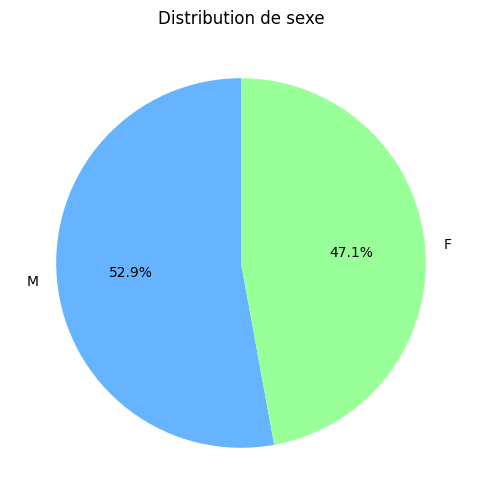

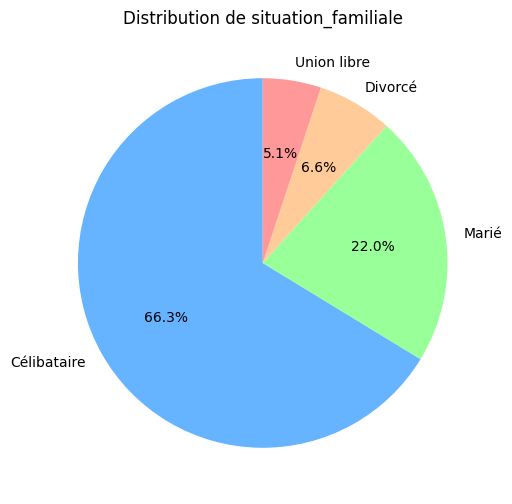

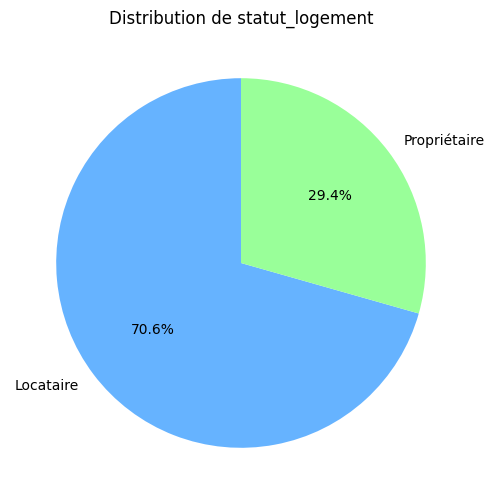

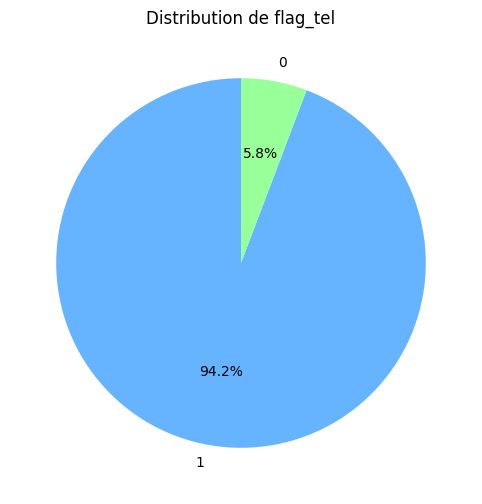

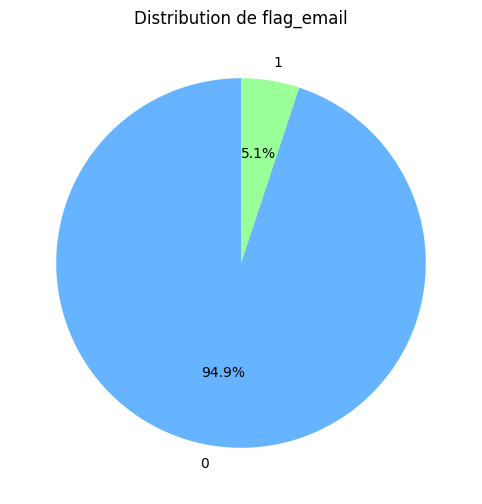

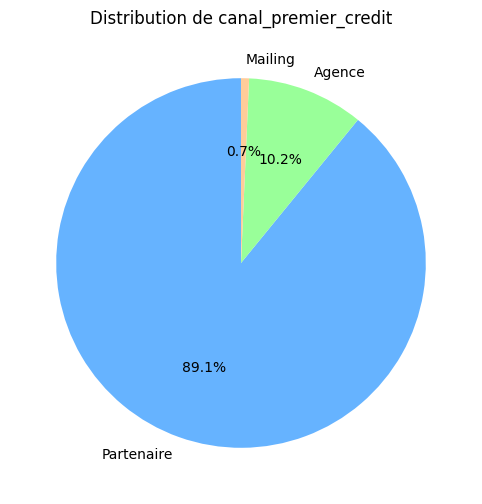

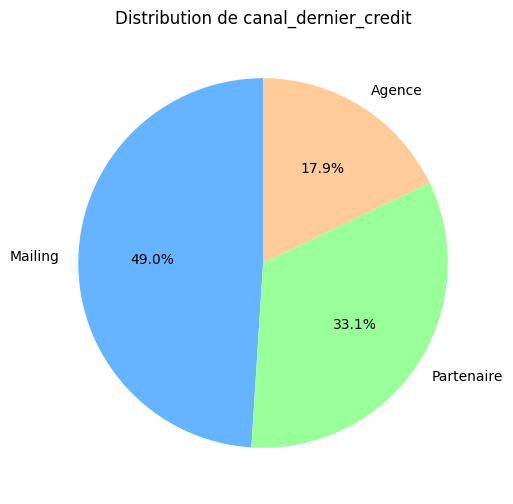

In [71]:
# Afficher les valeurs uniques et leur fréquence
cat_cols = ["sexe", "situation_familiale", "statut_logement","flag_tel","flag_email", "canal_premier_credit", "canal_dernier_credit"]
for col in cat_cols:
    plt.figure(figsize=(8, 6))
    data[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=["#66b3ff", "#99ff99", "#ffcc99", "#ff9999"])
    plt.title(f"Distribution de {col}")
    plt.ylabel("")  # Masquer l'axe y
    plt.show()

#### 📌 Variables numériques

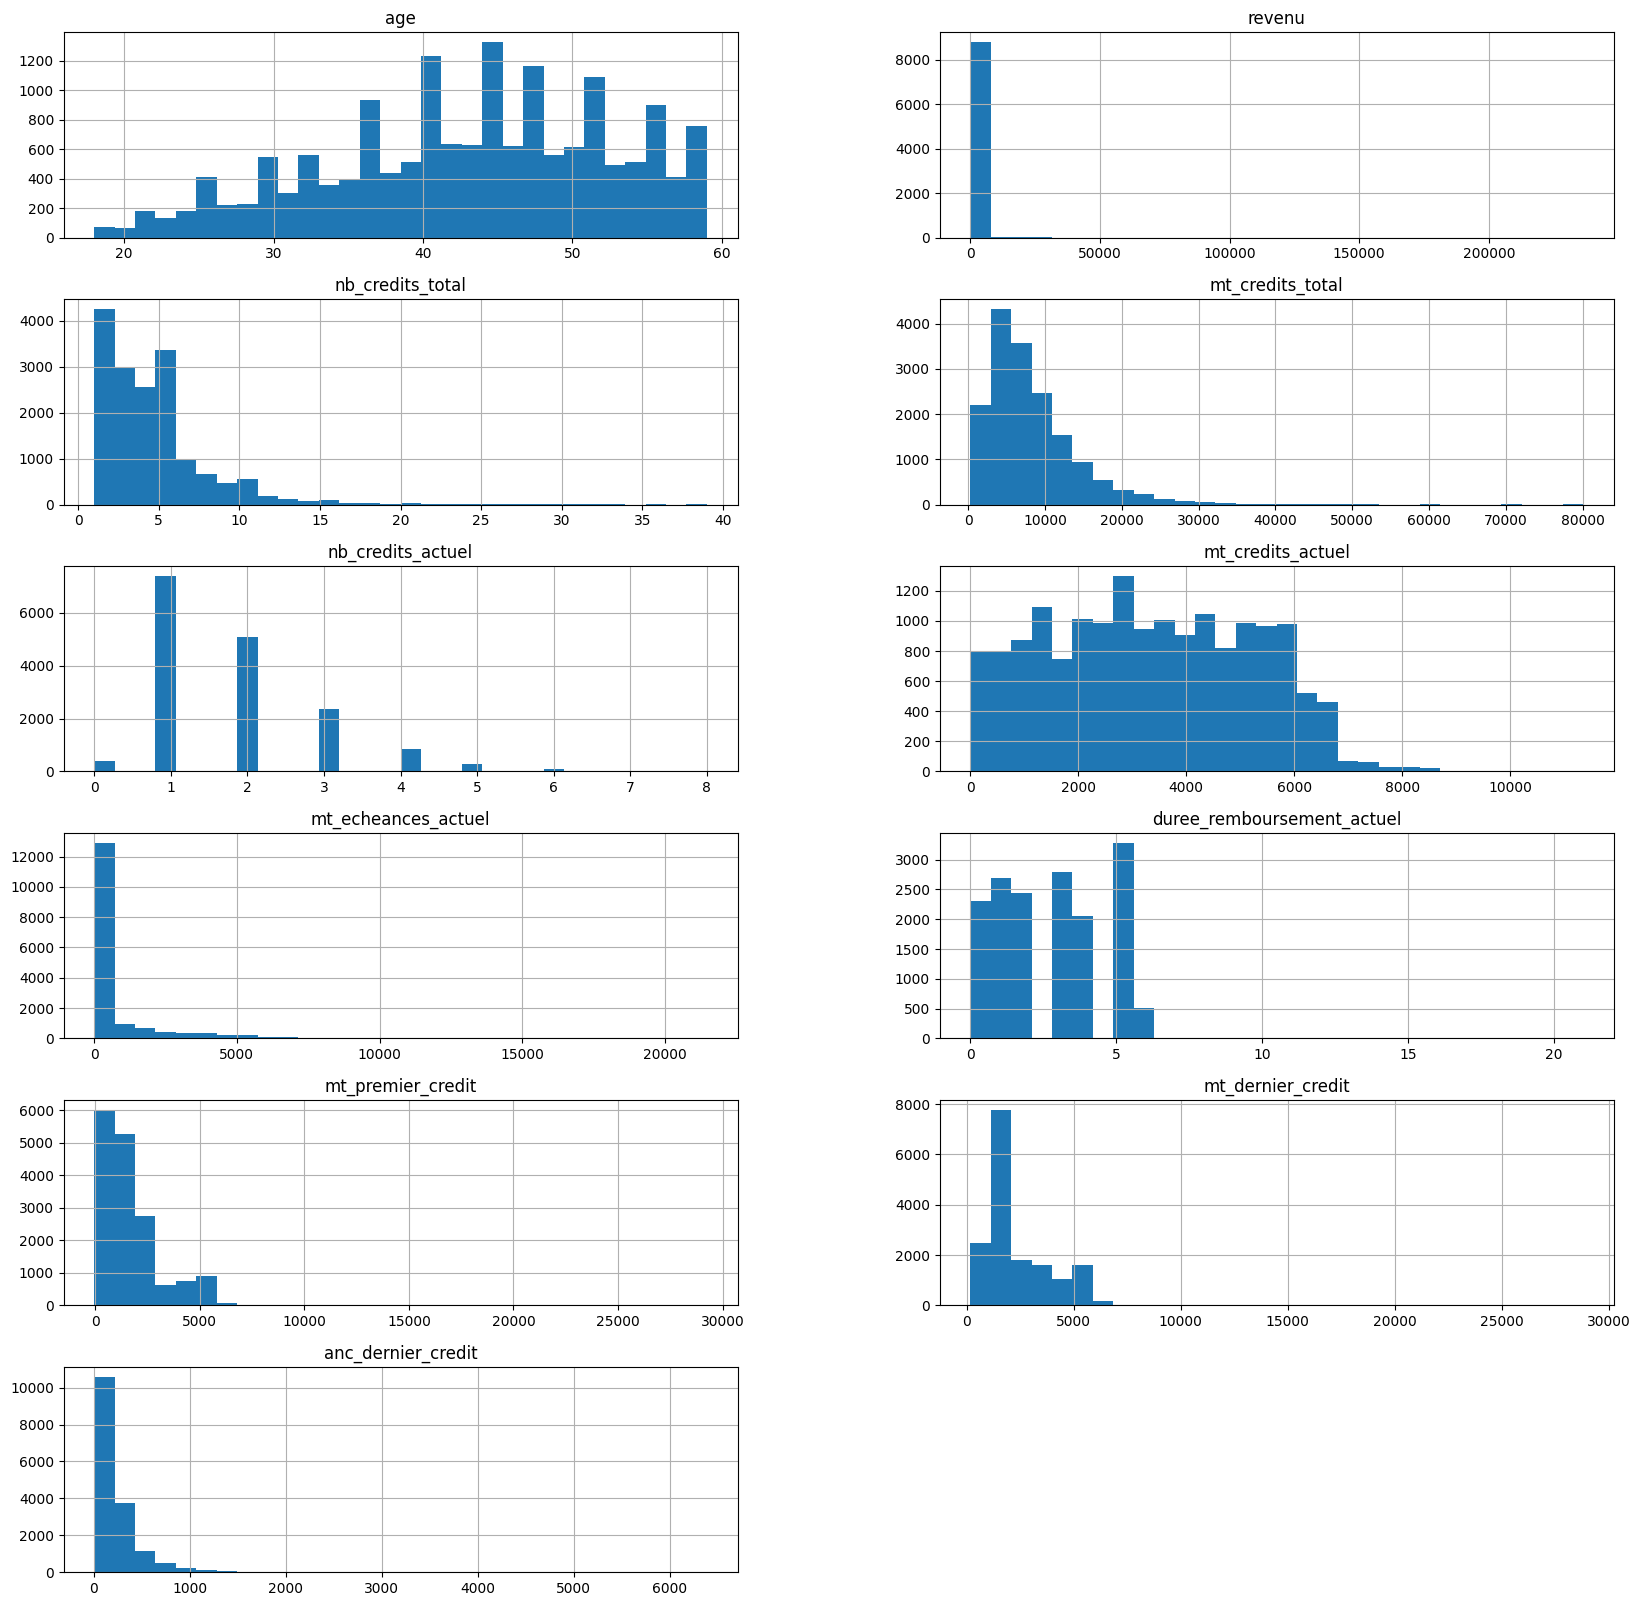

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ["age", "revenu", "nb_credits_total", "mt_credits_total", "nb_credits_actuel", "mt_credits_actuel","mt_echeances_actuel","duree_remboursement_actuel","mt_premier_credit", "mt_dernier_credit","anc_dernier_credit"]

# Histogrammes des variables numériques
data[num_cols].hist(bins=30, figsize=(20, 20), layout=(6, 2))
plt.show()


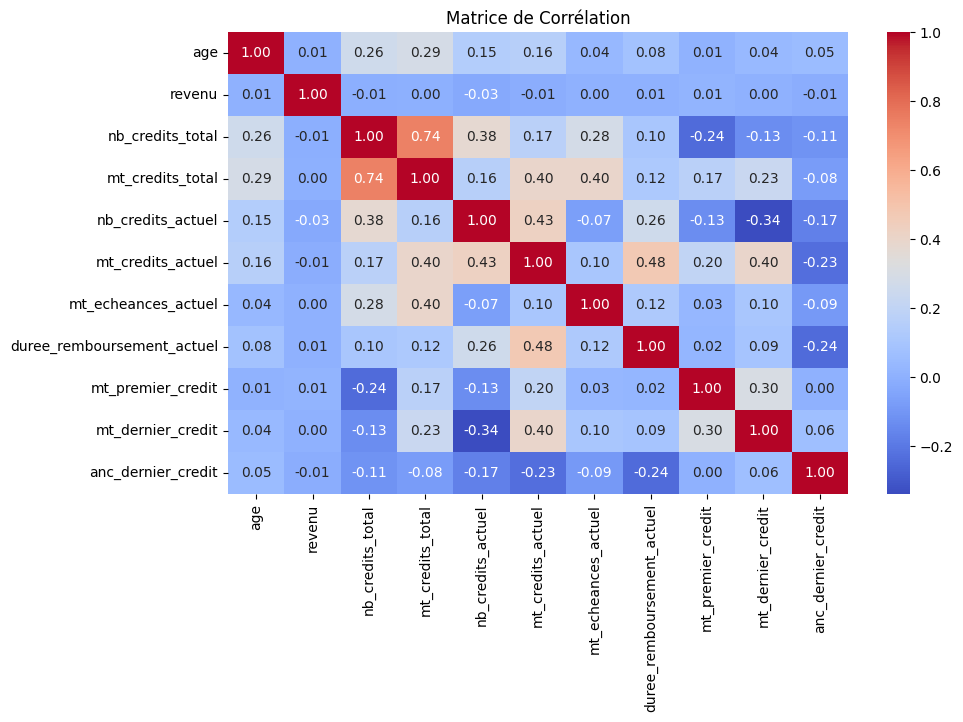

In [34]:
plt.figure(figsize=(10, 6))
sns.heatmap(data[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de Corrélation")
plt.show()


C:\Users\LENOVO PC\AppData\Local\Temp\ipykernel_23820\231898527.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data["nb_credits_actuel"], ax=ax, palette="Set2")
C:\Users\LENOVO PC\AppData\Local\Temp\ipykernel_23820\231898527.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
C:\Users\LENOVO PC\AppData\Local\Temp\ipykernel_23820\231898527.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[col], y=data["nb_credits_actuel"], ax=ax, palette="Set2")
C:\Users\LENOVO PC\AppData\Local\Temp\ipykernel_23820\231898527.py:11: UserWarnin

IndexError: index 2 is out of bounds for axis 0 with size 2

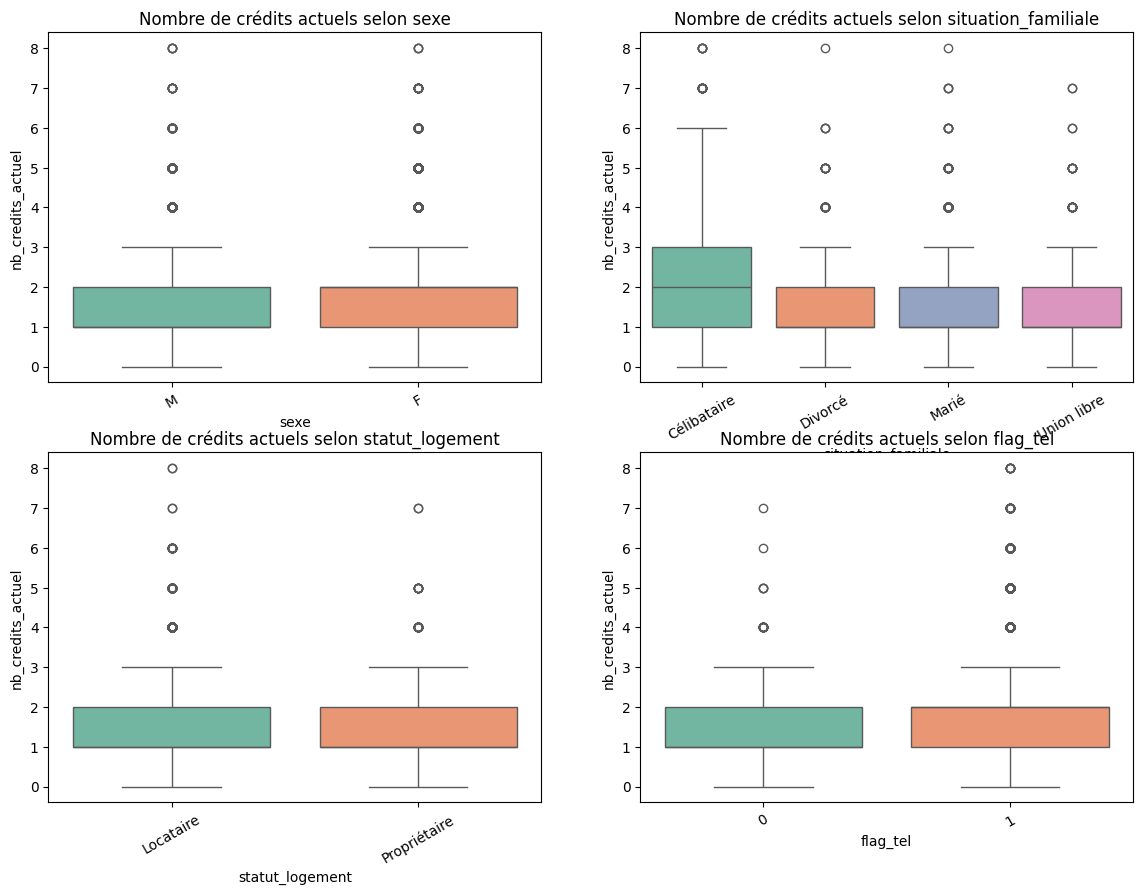

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Création des sous-plots pour les variables qualitatives
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for i, col in enumerate(cat_cols):
    ax = axes[i // 2, i % 2]
    sns.boxplot(x=data[col], y=data["nb_credits_actuel"], ax=ax, palette="Set2")
    ax.set_title(f"Nombre de crédits actuels selon {col}")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

plt.tight_layout()
plt.show()


IndexError: index 2 is out of bounds for axis 0 with size 2

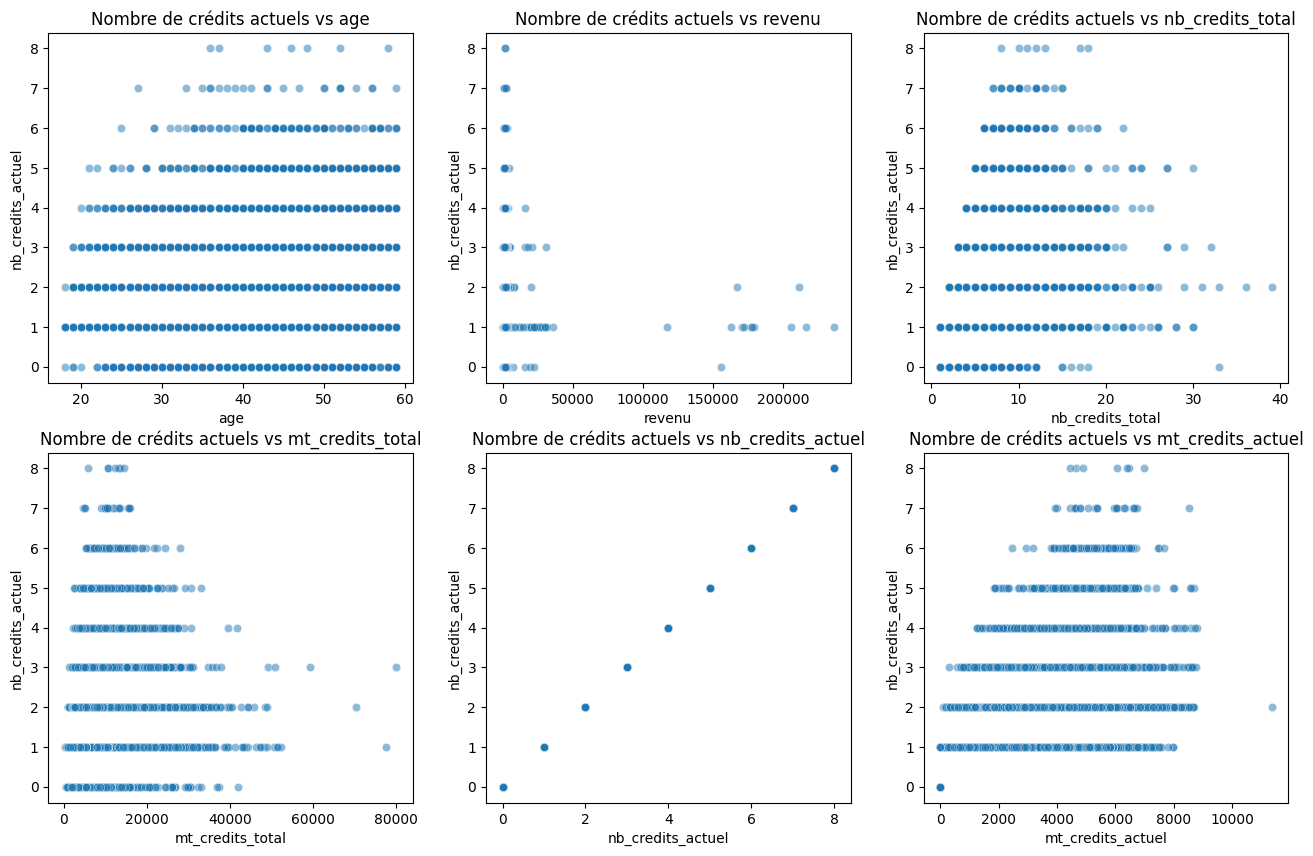

In [73]:
# Scatterplots pour voir la relation entre nb_credits_actuel et chaque variable quantitative
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

for i, col in enumerate(num_cols):
    ax = axes[i // 3, i % 3]
    sns.scatterplot(x=data[col], y=data["nb_credits_actuel"], alpha=0.5, ax=ax)
    ax.set_title(f"Nombre de crédits actuels vs {col}")

plt.tight_layout()
plt.show()

# Heatmap de corrélation pour voir les relations entre nb_credits_actuel et les variables quantitatives
plt.figure(figsize=(10, 6))
corr = data[num_cols + ["nb_credits_actuel"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Corrélation entre nb_credits_actuel et les variables quantitatives")
plt.show()


In [78]:
# 1. Filtrer par revenu (clients avec un revenu au-dessus de la médiane)
#seuil_revenu = data["revenu"].quantile(0.25)

# 2. Filtrer par nombre de crédits actuels (au moins entre 1 et 3)
clients_avec_credits = data[(data["nb_credits_actuel"] > 1) & (data["nb_credits_actuel"] < 4)]

# 3. Filtrer par montant total des crédits (supérieur au seuil moyen)
seuil_montant_credits = data["mt_credits_actuel"].quantile(0.75)
clients_avec_bon_montant = clients_avec_credits[clients_avec_credits["mt_credits_actuel"] < seuil_montant_credits]

# 4. Filtrer par durée restante des crédits (durée < 3 ans)
clients_duree_courte = clients_avec_bon_montant[clients_avec_bon_montant["duree_remboursement_actuel"] < 4]

# 5. Filtrer par ancienneté du dernier crédit (moins de 6 mois)
seuil_anciennete_dernier_credit = 400  # 6 mois en jours
clients_recent_dernier_credit = clients_duree_courte[clients_duree_courte["anc_dernier_credit"] <= seuil_anciennete_dernier_credit]
# 7. Sélectionner les 2000 meilleurs clients par score décroissant (par exemple, basé sur revenu et montant des crédits)


In [79]:
top_2000_clients = clients_recent_dernier_credit.nlargest(2000, ["revenu", "mt_credits_actuel"])
top_2000_clients['id_client'].to_csv('c2_valdes.txt', sep=';', index=False, header=False)

(2000,)

## Etape 3 : Analyse des profiles